<h2> Case Description </h2>
<br>The HRD department receives many complaints about many employees leaving the company and complaints about poor employee performance. </br>
<br>Lead of people wants to prevent employee turnover as well as increase employee performance.</br>
<br>In order to resolve the problems, he assigned you to make a data product that help him to assess the problems.</br>
<br>Lead of people needs to assess:</br> How bad is the employee turnover and How bad is the employee performance?

<h3> Dataset Overview </h3>
<p>The dataset consist of people analytics data in ABC Company</p>
<p>Features in dataset:</p>
<li>Employee ID</li>
<li>Gender: Male / Female</li>
<li>Age: Numeric</li>
<li>Education: Education Level (Primary - Ph.D.)</li>
<li>Department: Company Department (e.g. marketing, operational, etc.)</li>
<li>Performance Rating: Employee performance rating assesed by their manager</li>
<li>Absent: Number of days employee unplanned period of being away from work</li>
<li>Turnover: leaving employee from the organization</li>
<li>ESI 1: Employee satisfaction index survey result for question 1 in likert scale (1-10)</li>
<li>ESI 2: Employee satisfaction index survey result for question 2 in likert scale (1-10)</li>
<li>ESI 3: Employee satisfaction index survey result for question 3 in likert scale (1-10)</li>
<li>Promoted this year: Binary (Yes/No)</li>
<li>Complete the Training Course: Binary (Yes/No)</li>
<li>Training Evaluation Score: Score of employee training evaluation</li>
<li>Min. pass training eval. score: Minium training evaluation score</li>


<h2> Importing Libraries </h2>

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set_palette('tab10')

In [148]:
df = pd.read_excel('Dataset Liveclass week 3.xlsx')
df.head()

,Employe ID,Gender,Age,Education,Department,Performance Rating,Absent,Turnover,ESI 1,ESI 2,ESI 3,Promoted This Year,Complete the Training Course,Training Evaluation Score,Min. Training Pass Eval. Score
0,BCGX7377,Male,27,Master’s degree,Business Development,7.92,1,No,9,8,6,No,Yes,98,70
1,BCGX4795,Male,44,Higher education (Bachelor’s degree),Engineering,5.94,7,No,8,10,9,No,No,91,70
2,BCGX4007,Female,21,Higher education (Bachelor’s degree),Human Resources,9.90,0,No,8,10,10,Yes,No,62,70
3,BCGX9524,Male,47,Higher education (Bachelor’s degree),Business Development,9.90,5,No,7,9,8,Yes,No,77,70
4,BCGX8426,Female,46,Doctor of Philosophy (Ph.D.),Product Management,7.92,4,No,9,9,9,No,Yes,85,70


<h2> Explanatory Data Analysis </h2>

In [149]:
df.describe()

,Age,Performance Rating,Absent,ESI 1,ESI 2,ESI 3,Training Evaluation Score,Min. Training Pass Eval. Score
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.0
mean,34.853630,7.554157,3.809133,7.613583,8.090164,7.785714,80.477752,70.0
std,9.330125,1.247926,2.094454,1.457681,1.433994,1.474991,12.015576,0.0
min,19.000000,5.090000,0.000000,5.000000,5.000000,5.000000,59.000000,70.0
25%,27.000000,6.930000,2.000000,6.000000,7.000000,6.000000,70.000000,70.0
50%,35.000000,7.570000,4.000000,7.000000,8.000000,8.000000,83.000000,70.0
75%,43.000000,8.320000,6.000000,9.000000,9.000000,9.000000,89.000000,70.0
max,51.000000,9.900000,7.000000,10.000000,10.000000,10.000000,100.000000,70.0


In [150]:
col_object = df.select_dtypes(include='object').columns
for col in col_object[1:]:
    print('{}: {}'.format(col,pd.unique(df[col])))

Gender: ['Male' 'Female']
Education: ['Master’s degree' 'Higher education (Bachelor’s degree)'
 'Doctor of Philosophy (Ph.D.)' 'Secondary education' 'Primary education']
Department: ['Business Development' 'Engineering' 'Human Resources'
 'Product Management' 'Creative' 'Data' 'Quality Assurance' 'Finance'
 'Legal' 'Operations' 'Marketing' 'Sales']
Turnover: ['No' 'Yes' 'v']
Promoted This Year: ['No' 'Yes']
Complete the Training Course: ['Yes' 'No']


In [151]:
df['Turnover'] = df['Turnover'].replace({'v':'Yes'})
print('{}: {}'.format('Turnover',pd.unique(df['Turnover'])))

Turnover: ['No' 'Yes']


Numerical Histogram

<Axes: xlabel='Min. Training Pass Eval. Score', ylabel='Count'>

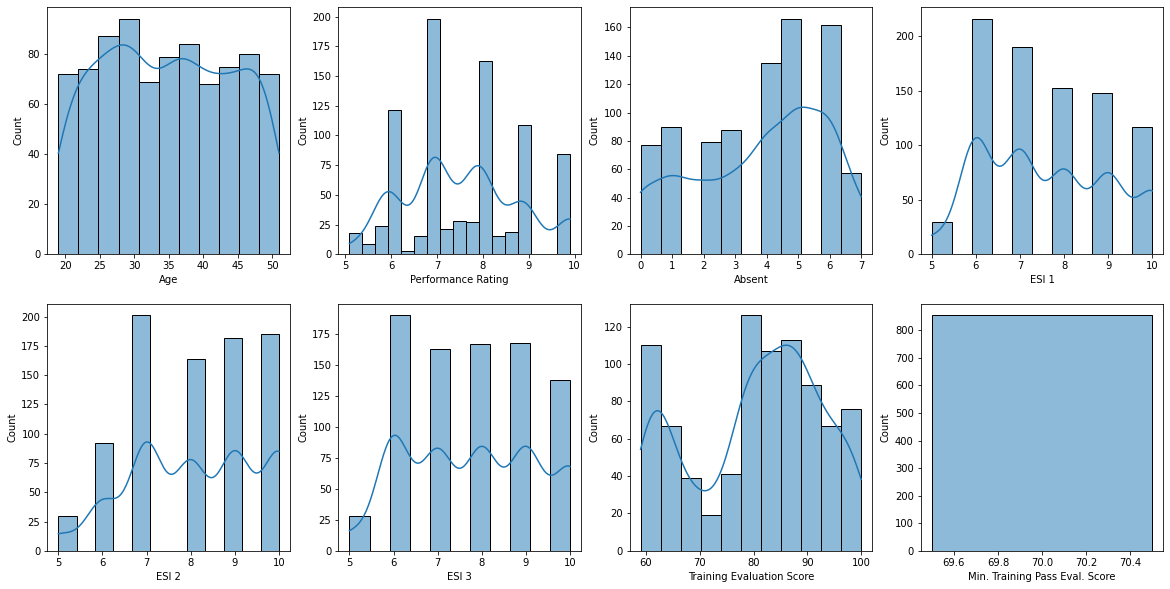

In [152]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
sns.histplot(data=df,x='Age',ax=axs[0][0],kde=True)
sns.histplot(data=df,x='Performance Rating',ax=axs[0][1],kde=True)
sns.histplot(data=df,x='Absent',ax=axs[0][2],kde=True)
sns.histplot(data=df,x='ESI 1',ax=axs[0][3],kde=True)
sns.histplot(data=df,x='ESI 2',ax=axs[1][0],kde=True)
sns.histplot(data=df,x='ESI 3',ax=axs[1][1],kde=True)
sns.histplot(data=df,x='Training Evaluation Score',ax=axs[1][2],kde=True)
sns.histplot(data=df,x='Min. Training Pass Eval. Score', ax=axs[1][3],kde=True)

<h3>EDA Numerical</h3>
<li>Age distribution is uniform enough</li>
<li>Performance Rating as it's peak at around 7</li>
<li>>500 employee have been Absent more than 4 days</li>
<li> Few employee (<30) are Detractor (<6)(unsatisfied with work environment) look by ESI</li>
<li>By looking at Training Evaluation Score, very few people has average score, either the're poor or good performance</li>

Categorical Histogram

<Axes: xlabel='Complete the Training Course', ylabel='Count'>

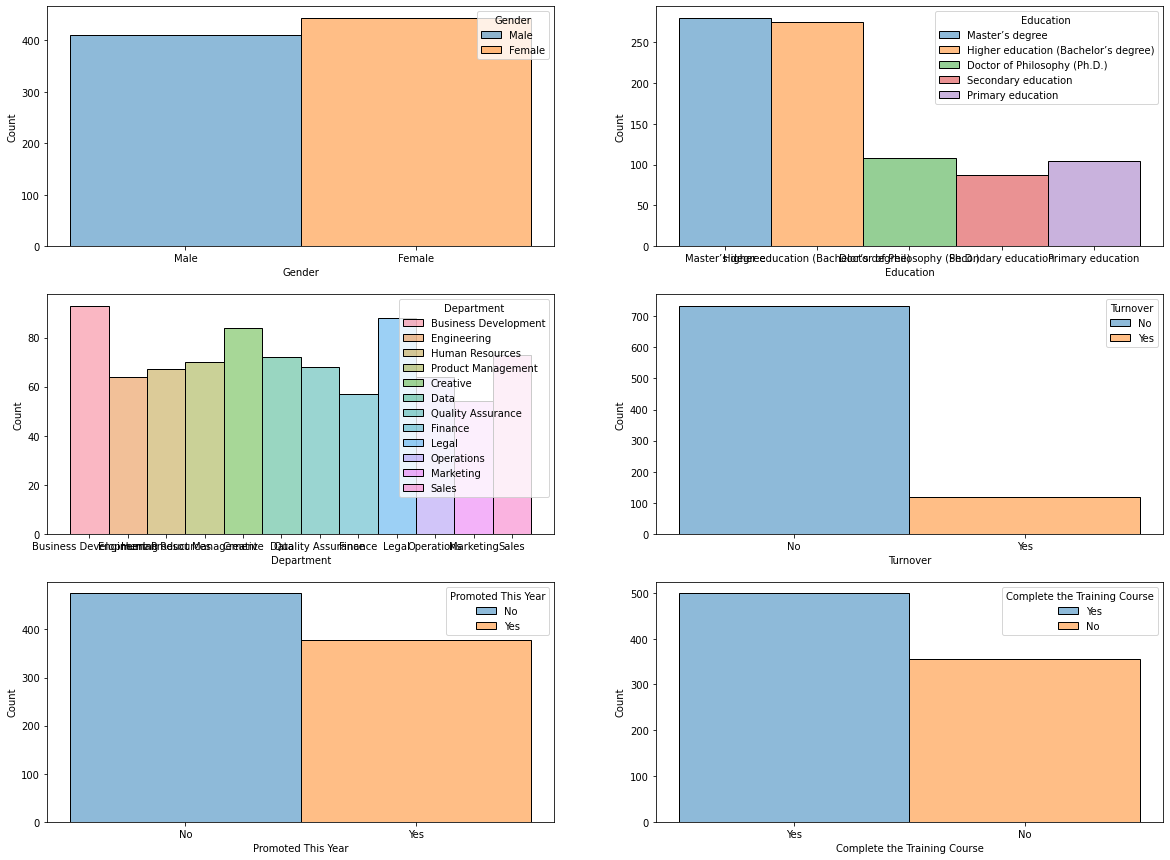

In [153]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sns.histplot(data=df,x='Gender',ax=axs[0][0],hue='Gender')
sns.histplot(data=df,x='Education',ax=axs[0][1],hue='Education')
sns.histplot(data=df,x='Department',ax=axs[1][0],hue='Department')
sns.histplot(data=df,x='Turnover',ax=axs[1][1],hue='Turnover')
sns.histplot(data=df,x='Promoted This Year',ax=axs[2][0],hue='Promoted This Year')
sns.histplot(data=df,x='Complete the Training Course',ax=axs[2][1],hue='Complete the Training Course')

<h3>EDA Categorical</h3>
<li>Distribution of Gender is similar enough with Female dominated</li>
<li>Legal and Business Development dominated the department distribution</li>
<li>Most of our employee are from Bachelor and Master Degree</li>

In [154]:
# Replace boolean column with binary
df = df.replace({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})
for col in col_object[1:]:
    print('{}: {}'.format(col,pd.unique(df[col])))

Gender: [1 0]
Education: ['Master’s degree' 'Higher education (Bachelor’s degree)'
 'Doctor of Philosophy (Ph.D.)' 'Secondary education' 'Primary education']
Department: ['Business Development' 'Engineering' 'Human Resources'
 'Product Management' 'Creative' 'Data' 'Quality Assurance' 'Finance'
 'Legal' 'Operations' 'Marketing' 'Sales']
Turnover: [0 1]
Promoted This Year: [0 1]
Complete the Training Course: [1 0]
